In [1]:
import pandas as pd
import numpy as np
import scipy
import pysr
import sympy
import math
from pysr import PySRRegressor
import matplotlib.pyplot as plt
import pickle

[juliapkg] Found dependencies: /home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/juliapkg.json
[juliapkg] Found dependencies: /home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/juliapkg/juliapkg.json
[juliapkg] Found dependencies: /home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/juliacall/juliapkg.json
[juliapkg] Locating Julia =1.10.0, ^1.10.3
[juliapkg] Querying Julia versions from https://julialang-s3.julialang.org/bin/versions.json
[juliapkg] WARNING: About to install Julia 1.11.5 to /home/ajt6830/.local/share/mamba/envs/pysr_env/julia_env/pyjuliapkg/install.
[juliapkg]   If you use juliapkg in more than one environment, you are likely to
[juliapkg]   have Julia installed in multiple locations. It is recommended to
[juliapkg]   install JuliaUp (https://github.com/JuliaLang/juliaup) or Julia
[juliapkg]   (https://julialang.org/downloads) yourself.
[juliapkg] Downloading Julia from https://julialang-s3

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
    Updating `~/.local/share/mamba/envs/pysr_env/julia_env/Project.toml`
  [6099a3de] + PythonCall v0.9.25
⌅ [8254be44] + SymbolicRegression v1.11.3
  [458c3c95] + OpenSSL_jll v3.5.1+0
  [9e88b42a] ~ Serialization ⇒ v1.11.0
    Updating `~/.local/share/mamba/envs/pysr_env/julia_env/Manifest.toml`
  [47edcb42] + ADTypes v1.15.0
  [79e6a3ab] + Adapt v4.3.0
  [66dad0bd] + AliasTables v1.1.3
  [4fba245c] + ArrayInterface v7.19.0
  [d360d2e6] + ChainRulesCore v1.25.2
  [bbf7d656] + CommonSubexpressions v0.3.1
  [34da2185] + Compat v4.17.0
  [992eb4ea] + CondaPkg v0.2.29
  [187b0558] + ConstructionBase v1.6.0
  [9a962f9c] + DataAPI v1.16.0
  [864edb3b] + DataStructures v0.18.22
  [e2d170a0] + DataValueInterfaces v1.0.0
  [163ba53b] + DiffResults v1.1.0
  [b552c78f] + DiffRules v1.15.1
  [a0c0ee7d] + DifferentiationInterface v0.7.2
  [8d63f2c5] + DispatchDoctor v0.4.26
  [ffbed154] + DocStringExtensio

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [2]:
pip install sxs

  Using cached sxs-2025.0.17-py3-none-any.whl.metadata (13 kB)
  Using cached bibtexparser-2.0.0b8-py3-none-any.whl.metadata (5.4 kB)
  Using cached h5py-3.14.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.7 kB)
  Using cached inflection-0.5.1-py2.py3-none-any.whl.metadata (1.7 kB)
  Using cached quaternionic-1.0.15-py3-none-any.whl.metadata (18 kB)
  Using cached spherical-1.0.16-py3-none-any.whl.metadata (7.7 kB)
  Using cached sxscatalog-3.0.15-py3-none-any.whl.metadata (1.6 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached pylatexenc-2.10-py3-none-any.whl
  Using cached spinsfast-2022.4.10-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (520 bytes)
Using cached sxs-2025.0.17-py3-none-any.whl (224 kB)
Using cached bibtexparser-2.0.0b8-py3-none-any.whl (39 kB)
Using cached h5py-3.14.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.5 MB)
Using cached inflection-0.5.1-py2.py3-none-any.whl (9.5 kB

In [3]:
import sxs
print(sxs.__file__)
print(sxs.__version__)
print(dir(sxs))

/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/sxs/__init__.py
2025.0.17
['Catalog', 'HorizonQuantities', 'Horizons', 'Metadata', 'Simulation', 'Simulations', 'TimeSeries', 'WaveformModes', 'WaveformModesDict', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', 'astronomical_unit', 'catalog', 'citation', 'cite', 'doi_prefix', 'doi_url', 'file_format', 'guvectorize', 'handlers', 'horizons', 'importlib_metadata', 'jit', 'lev_number', 'load', 'load_lvc', 'load_via_sxs_id', 'loadcontext', 'local_simulations', 'm_sun_in_meters', 'm_sun_in_seconds', 'metadata', 'parsec_in_meters', 'read_config', 'rpdmb', 'rpxmb', 'simulations', 'solar_mass_parameter', 'spectre_cce_v1', 'speed_of_light', 'sxs_directory', 'sxs_id', 'sxs_id_to_url', 'time_series', 'to_lvc_conventions', 'utilities', 'vectorize', 'version_info', 'waveforms', 'write_config', 'write_local_simulations', 'zenodo']


In [4]:
def dataframe(non_eccentric, non_spinning, aligned_spin, not_deprecated):
    df = sxs.load("dataframe")
    df = df.loc[np.isfinite(df["common_horizon_time"])] #This gets rid of any simulations with neutron stars
    df = df.loc[np.isfinite(df["reference_eccentricity"])] #Apparently some bhbh simulations with NaN values for the eccentricity
    if non_eccentric:
        df = df.loc[df['reference_eccentricity'] < 0.01]
    if non_spinning:
        df = df.loc[df["reference_dimensionless_spin1_mag"] < 0.001]
        df = df.loc[df["reference_dimensionless_spin2_mag"] < 0.001]
    if aligned_spin:
        df = df.loc[df["reference_dimensionless_spin1_x"] < 0.001]
        df = df.loc[df["reference_dimensionless_spin2_x"] < 0.001]
        df = df.loc[df["reference_dimensionless_spin1_y"] < 0.001]
        df = df.loc[df["reference_dimensionless_spin2_y"] < 0.001]
    if not_deprecated:
        df = df.loc[df["deprecated"] == False]
    #df = df.drop('SXS:BBH:0621') #All of my best models were having a hard time fitting CHT for this simulation. Seems like an outlier
    return df    
    
df = dataframe(non_eccentric = False, non_spinning = False, aligned_spin = False, not_deprecated = True)
print(len(df))

Loading SXS simulations using latest tag 'v3.0.0', published at 2025-05-14T18:17:30Z.
3717


In [5]:
ref_orb_period = 2*np.pi/df["reference_orbital_frequency_mag"]
CHT = df["common_horizon_time"] - df["reference_time"]

In [6]:
def Newtonian_CHT(X):
    #tau is orbital period, q is mass_ratio, A is scaling constant based on fundamental mathematical and physical constants with G = C = 1
    A = 5/(16*np.pi)**(8/3)
    tau, q = X
    return A*tau**(8/3)*(q+1)**2/q

def nu(q):
    return q/(q+1)**2

In [7]:
#This first block subtracts corrections due to varying mass ratio from the quadrupolar, Newtonian model
init_param_q = np.column_stack((ref_orb_period, df["reference_mass_ratio"]))
with open("best_model_0.446.pk", 'rb') as file:
    loaded_model_q = pickle.load(file)

#This second block subtracts spin corrections from the quadrupolar, Newtonian model
init_param_spin = np.column_stack((ref_orb_period, df["reference_mass_ratio"], df["reference_chi_eff"]))
with open("chi_spin_model_0.865.pk", 'rb') as file:
    loaded_model_spin = pickle.load(file)

#This third block subtracts precession corrections from the quadrupolar, Newtonian model
init_param_precess = np.column_stack((ref_orb_period, df["reference_mass_ratio"], df["reference_chi2_perp"], df["reference_chi1_perp"]))
with open("chi_spin_model_0.749.pk", 'rb') as file:
    loaded_model_precess = pickle.load(file)

corrections = loaded_model_q.predict(init_param_q) + loaded_model_spin.predict(init_param_spin) + loaded_model_precess.predict(init_param_precess) #Compile corrections from mass ratio and spin

corrected_CHT = Newtonian_CHT([ref_orb_period, df["reference_mass_ratio"]]) - corrections #Subtracts "post-Newtonian" corrections from the Newtonian predictions for CHT

CHT_residual = corrected_CHT - CHT #Defines whatever residual is left over after post-Newtonian corrections are applied to the Newtonian model

In [8]:
default_pysr_params = dict(
    populations = 30,
    model_selection="best",
)


In [9]:
model = PySRRegressor(
    niterations=100,
    binary_operators=["+", "*", "-"],
    unary_operators=["square", "cube", "sqrt", "cbrt", "inv(x) = 1/x"], #"cube_root(x) = cbrt(x)"
    extra_sympy_mappings={"inv": lambda x: 1/x}, #"square": lambda x: x**2, "cube_root": lambda x: x**(1/3)
    **default_pysr_params,
    elementwise_loss="loss(prediction, target, w) = ((prediction - target)/w)^2"
    # ^ Custom loss function (julia syntax). It takes the difference of the PN residual from the PySR estimation and weights it by the inverse
    #of the length of the original simulation
)

/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
Compiling Julia backend...
[ Info: Started!



Expressions evaluated per second: 5.050e+04
Progress: 272 / 3000 total iterations (9.067%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           7.255e-01  0.000e+00  y = x₀
3           6.874e-01  2.696e-02  y = sqrt(cube(x₀))
4           2.702e-03  5.539e+00  y = cube(x₀) * 2.4318e-05
6           1.407e-03  3.263e-01  y = cube(x₀ * 0.028885) * x₁
18          1.027e-03  2.621e-02  y = cube(square(sqrt(sqrt(sqrt(cube(square(sqrt(sqrt(sqrt(...
                                      x₀))) - -2.7333)))) - -1.4994) - cbrt(x₀)))
20          1.003e-03  1.172e-02  y = cube(square(sqrt(sqrt(cube(sqrt(square(sqrt(sqrt(sqrt(...
                                      x₀))) - -2.7333)))) - -1.4994) - cbrt(x₀)) + -0.35009)
22          6.896e-04  1.875e-01  y = square(square(square(cbrt(x₂) * sqrt(sqrt(

[ Info: Final population:
[ Info: Results saved to:


Current Prediction Average Error (%): 12.947695401187495
Best Prediction Average Error (%): 10
Current Model Formula: ((x1 - 2.321855)*(Abs(x2)**(1/3)*sign(x2) + 1.2431972)**2 + (Abs(x0)**(1/3)*sign(x0) - 3.5632098)**2 - 11.501036)**3


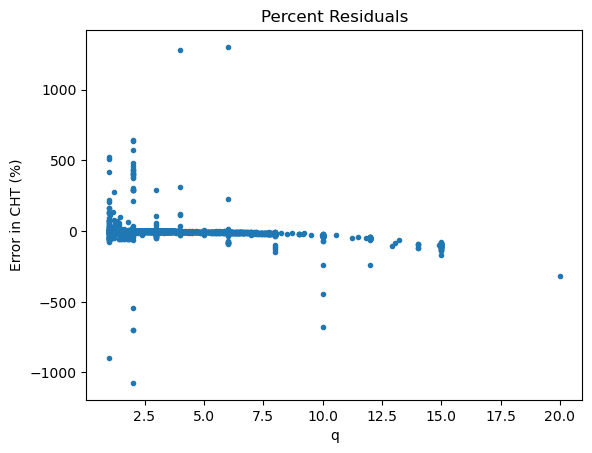

/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


In [ ]:
def Looped_Symbolic_Regression(num, fitting_params, fitted_data):
    best_avg_err = 10
    for i in range(num):
        model.fit(fitting_params, fitted_data, weights = CHT) 
        pred = model.predict(fitting_params)
        current_avg_error = 100*np.sqrt(np.power((fitted_data - pred)/CHT, 2)).mean()
        
        print("Current Prediction Average Error (%):", current_avg_error)
        print("Best Prediction Average Error (%):", best_avg_err)
        print("Current Model Formula:", model.sympy())
        plt.scatter(df["reference_mass_ratio"], 100*(fitted_data - pred)/CHT, marker = ".", label = "PySR") #Plots leftover error
        plt.xlabel("q")
        plt.ylabel("Error in CHT (%)")
        plt.title("Percent Residuals")
        plt.show()

        '''
        if current_avg_error < best_avg_err:
            best_avg_err = current_avg_error
            best_model = model
            plt.savefig(f"chi_spin_model_{round(best_avg_err, 3)}.png")
            with open(f'chi_spin_model_{round(best_avg_err, 3)}.pk', 'wb') as best_model_file: #We create a pickle file called 'best_model.pk' that we want to write into and call it best_model_file
                pickle.dump(model, best_model_file) #We write the current state of the model to the pickle file created above
        
        plt.close()

        plt.scatter(ref_orb_period, 100*(fitted_data - pred)/CHT, marker = ".", label = "PySR") #Plots leftover error
        plt.xlabel(r"$\tau$")
        plt.ylabel("Error in CHT (%)")
        plt.title("Percent Residuals")

        if current_avg_error == best_avg_err:
            plt.savefig(f"chi_spin_orb_model_{round(best_avg_err, 3)}.png")
        
        plt.close()
        '''
fitting_params = np.column_stack((ref_orb_period, df["reference_mass_ratio"],  df["reference_eccentricity"]))
Looped_Symbolic_Regression(10, fitting_params, CHT_residual)